In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#sns.color_palette()

In [ ]:
dataset = pd.read_csv("titanic_train.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

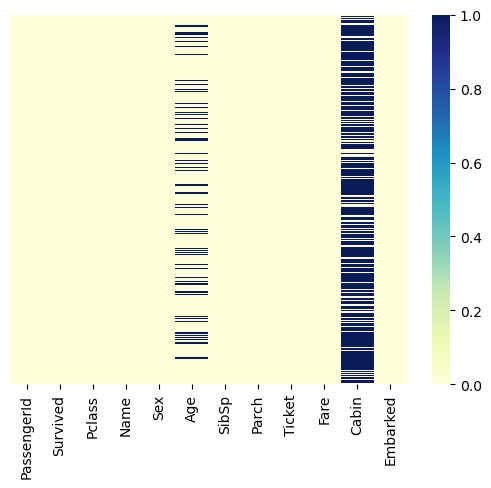

In [ ]:
sns.heatmap ( dataset.isnull() ,  yticklabels=False, cmap="YlGnBu")

In [ ]:
#y = dataset['Survived']

In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.drop("PassengerId" , axis=1 , inplace=True)
dataset.drop("Name" , axis=1 , inplace=True)
dataset.drop("Ticket" , axis=1 , inplace=True)
dataset.drop("Fare" , axis=1 , inplace=True)
dataset.drop("Parch" , axis=1 , inplace=True)
dataset.drop("Cabin" , axis=1 , inplace=True)

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,NaN,1,S
889,1,1,male,26.0,0,C


In [ ]:
# dataset["Pclass"] == 1

#age1 = int (dataset[  dataset["Pclass"] == 1    ]['Age'].dropna().mean() )

In [ ]:
#age2 = int (dataset[  dataset["Pclass"] == 2   ]['Age'].dropna().mean())

In [ ]:
# age3 = int (dataset[  dataset["Pclass"] == 3   ]['Age'].dropna().mean())

In [ ]:
for i in range(1, 4 ):
    age = int (dataset[  dataset["Pclass"] == i    ]['Age'].dropna().mean() )
    print(age)

38
29
25


In [ ]:
#dataset[ dataset["Pclass"] == 2 ]["Age"].isnull()

In [ ]:
#dataset[ dataset["Pclass"] == 1 ]["Age"].fillna(38)
#dataset[ dataset["Pclass"] == 2 ]["Age"].fillna(29)
#dataset[ dataset["Pclass"] == 3 ]["Age"].fillna(25)

In [ ]:
import numpy

def set_age(row):

    Pclass = row[0]
    age = row[1]

    if numpy.isnan(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25

    else:
        return age



In [ ]:
dataset["Age"] = dataset[  ["Pclass" ,"Age"] ].apply(set_age , axis=1)

<Axes: >

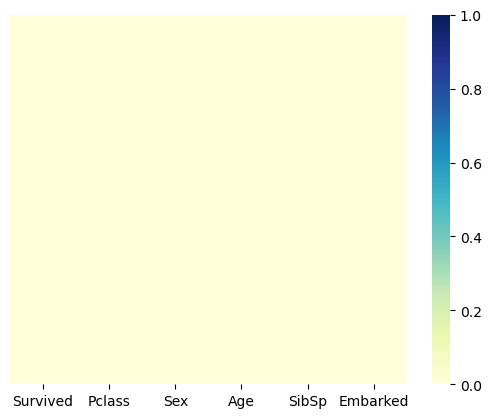

In [ ]:
sns.heatmap ( dataset.isnull() ,  yticklabels=False, cmap="YlGnBu")

In [ ]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,25.0,1,S
889,1,1,male,26.0,0,C


In [ ]:
Pclass = pd.get_dummies( dataset["Pclass"], drop_first=True)

In [ ]:
Sex = pd.get_dummies( dataset["Sex"], drop_first=True)

In [ ]:
SibSp = pd.get_dummies( dataset["SibSp"], drop_first=True)

In [ ]:
Embarked = pd.get_dummies( dataset["Embarked"], drop_first=True)

In [ ]:
dataset.drop( ["Pclass", "Sex", "SibSp", "Embarked"] , axis=1, inplace=True)

In [ ]:
dataset

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,25.0
889,1,26.0


In [ ]:
# dataset = pd.concat( [dataset , Pclass,Sex , SibSp,  Embarked ] , axis=1)

dataset = pd.concat( [dataset , Pclass,Sex , SibSp , Embarked] , axis=1)

In [ ]:
#dataset.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [ ]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
y = dataset["Survived"]

In [ ]:
X = dataset.drop("Survived", axis=1)

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[-0.02775559, -0.62200338, -1.8831153 , -2.47348605,  0.14914756,
         0.06287817, -1.04701841, -0.66384495, -0.73792744, -1.06813077,
        -0.16242574, -0.53647042]])

In [ ]:
model.intercept_

array([3.36209245])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [ ]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [19, 55]], dtype=int64)

In [ ]:
(90 + 55)  / ( 90 + 15 + 19 +55 )

0.8100558659217877

In [ ]:
dataset_test = pd.read_csv("titanic_test.csv")

In [ ]:
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
dataset_test.drop("PassengerId" , axis=1 , inplace=True)
dataset_test.drop("Name" , axis=1 , inplace=True)
dataset_test.drop("Ticket" , axis=1 , inplace=True)
dataset_test.drop("Fare" , axis=1 , inplace=True)
dataset_test.drop("Parch" , axis=1 , inplace=True)
dataset_test.drop("Cabin" , axis=1 , inplace=True)

In [ ]:
dataset_test

,Pclass,Sex,Age,SibSp,Embarked
0,3,male,34.5,0,Q
1,3,female,47.0,1,S
2,2,male,62.0,0,Q
3,3,male,27.0,0,S
4,3,female,22.0,1,S
...,...,...,...,...,...
413,3,male,NaN,0,S
414,1,female,39.0,0,C
415,3,male,38.5,0,S
416,3,male,NaN,0,S


In [ ]:
gender = dataset["Sex"]

KeyError: 'Sex'

In [ ]:
sns.countplot(data=dataset , x="Sex" )

In [ ]:
sns.countplot(data=dataset , x="Sex" , hue='Survived' )

ValueError: Could not interpret input 'Sex'

<Axes: xlabel='Pclass', ylabel='count'>

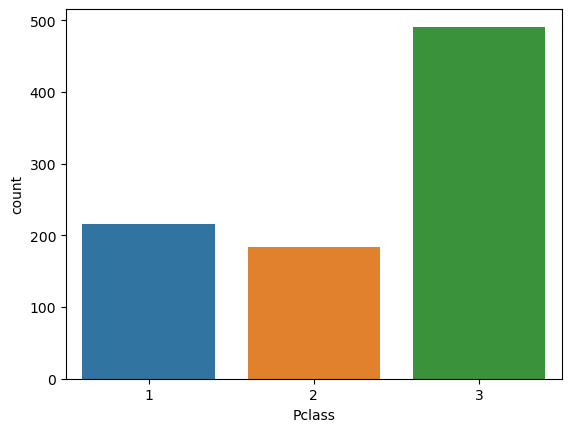

In [ ]:
sns.countplot(data=dataset , x="Pclass" )

<Axes: xlabel='Pclass', ylabel='count'>

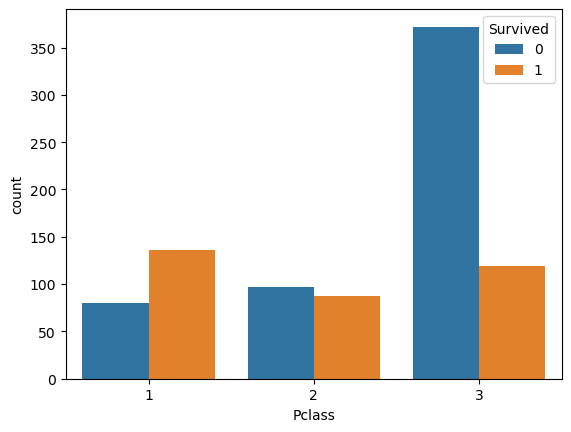

In [ ]:
sns.countplot(data=dataset , x="Pclass"  , hue='Survived' )

<Axes: xlabel='SibSp', ylabel='count'>

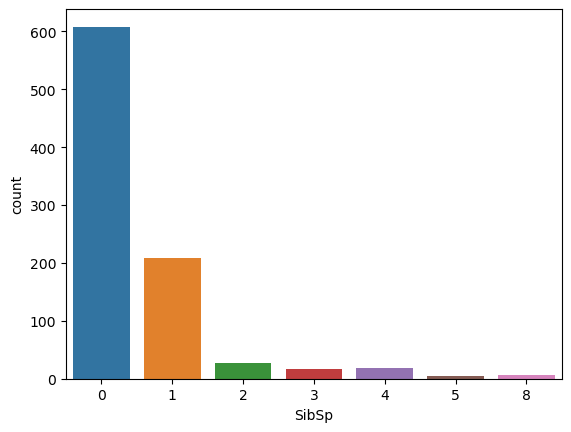

In [ ]:
sns.countplot(data=dataset , x="SibSp"   )

<Axes: xlabel='SibSp', ylabel='count'>

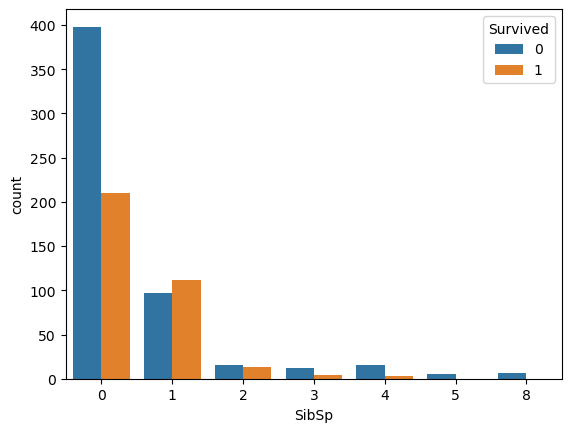

In [ ]:
sns.countplot(data=dataset , x="SibSp", hue="Survived"   )

<Axes: xlabel='Parch', ylabel='count'>

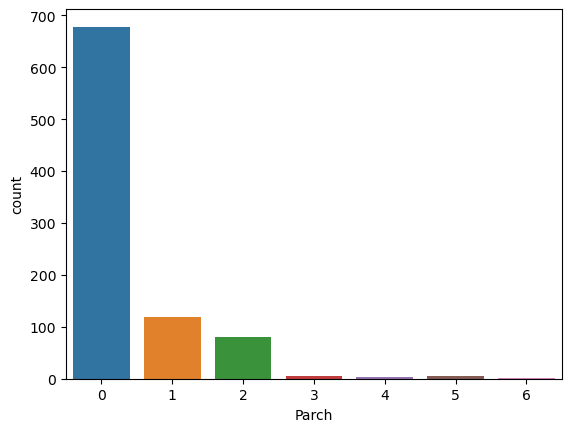

In [ ]:
sns.countplot(data=dataset , x="Parch"   )

<Axes: xlabel='Parch', ylabel='count'>

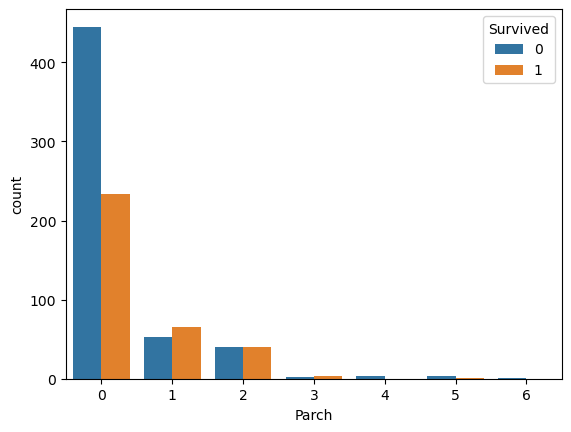

In [ ]:
sns.countplot(data=dataset , x="Parch" , hue="Survived"  )